In [1]:
import numpy as np
import json
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sys
import random
import keras as K
import tensorflow as tf
from keras.utils import to_categorical
from keras.callbacks import TensorBoard
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import CSVLogger
from keras.callbacks import TerminateOnNaN
from keras.models import load_model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pydotplus

In [2]:
data=pd.read_csv('ML_dataset.csv',sep=',')

In [3]:
label=data['label']
feature=data.drop(['label'],axis=1)
label=np.array(label)
label = to_categorical(label, 4)
feature=np.array(feature)
feature, label = shuffle(feature, label, random_state=0)
feature_train,feature_test,label_train,label_test=train_test_split(feature,label , test_size=0.3)

In [4]:
def defineModel():
    
    init = K.initializers.glorot_uniform(seed=1)
    model = K.models.Sequential()
    model.add(K.layers.Dense(units=16, input_dim=8,kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=16, kernel_initializer=init, activation='relu'))
    #model.add(K.layers.Dense(units=4, kernel_initializer=init, activation='relu'))
    model.add(K.layers.Dense(units=4, kernel_initializer=init, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
    model.summary()
    return model

In [5]:
model = defineModel()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                144       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 68        
Total params: 484
Trainable params: 484
Non-trainable params: 0
_________________________________________________________________


In [6]:
#callbacks = [es, mc, rp, cl, tn]
h = model.fit(feature_train, label_train, epochs=50,shuffle=True,batch_size=1, verbose=2, validation_split=0.3)

Epoch 1/50
157/157 - 0s - loss: 1.3654 - accuracy: 0.2994 - val_loss: 1.3535 - val_accuracy: 0.4118
Epoch 2/50
157/157 - 0s - loss: 1.3267 - accuracy: 0.4204 - val_loss: 1.3316 - val_accuracy: 0.5000
Epoch 3/50
157/157 - 0s - loss: 1.2811 - accuracy: 0.4459 - val_loss: 1.3095 - val_accuracy: 0.5147
Epoch 4/50
157/157 - 0s - loss: 1.2224 - accuracy: 0.4713 - val_loss: 1.2788 - val_accuracy: 0.5000
Epoch 5/50
157/157 - 0s - loss: 1.1531 - accuracy: 0.5096 - val_loss: 1.2451 - val_accuracy: 0.5000
Epoch 6/50
157/157 - 0s - loss: 1.0795 - accuracy: 0.5414 - val_loss: 1.2209 - val_accuracy: 0.5147
Epoch 7/50
157/157 - 0s - loss: 1.0110 - accuracy: 0.5669 - val_loss: 1.2073 - val_accuracy: 0.5147
Epoch 8/50
157/157 - 0s - loss: 0.9595 - accuracy: 0.5796 - val_loss: 1.2120 - val_accuracy: 0.5147
Epoch 9/50
157/157 - 0s - loss: 0.9171 - accuracy: 0.5669 - val_loss: 1.2160 - val_accuracy: 0.5294
Epoch 10/50
157/157 - 0s - loss: 0.8803 - accuracy: 0.5924 - val_loss: 1.2303 - val_accuracy: 0.5294

In [7]:
eval = model.evaluate(feature_test, label_test, verbose=0)
print("loss: ",eval[0]," accuarcy: ",eval[1])

loss:  0.974406361579895  accuarcy:  0.7628865838050842


In [8]:
def arraytoval(matrix):
    arr=[]
    for it in matrix:
        now_pre=0
        for i in range(1,len(it)):
            if it[i]>it[now_pre]:
                now_pre=i
        arr.append(now_pre)
    return arr

<function matplotlib.pyplot.show(close=None, block=None)>

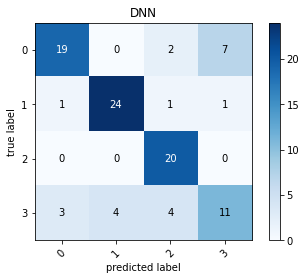

In [9]:
predict = model.predict(feature_test)
column_name=[0,1,2,3]
l,p=arraytoval(label_test),arraytoval(predict)
m=confusion_matrix(l,p)
figuer,ax=plot_confusion_matrix(conf_mat=m,show_absolute=True,show_normed=False,colorbar=True,class_names=column_name)
plt.title('DNN')
plt.show

In [10]:
re=recall_score(l,p, average=None)
precisi=precision_score(l,p, average=None)
dict={
    'label':[0,1,2,3],
    'recall_score':re,
    'precision_score':precisi,
}
report_df = pd.DataFrame(dict)
print("loss: ",eval[0]," accuarcy: ",eval[1])
print("Mean Absolute Error:",mean_absolute_error(label_test, predict))

loss:  0.974406361579895  accuarcy:  0.7628865838050842
Mean Absolute Error: 0.24020116


In [11]:
report_df

,label,recall_score,precision_score
0,0,0.678571,0.826087
1,1,0.888889,0.857143
2,2,1.000000,0.740741
3,3,0.500000,0.578947
